# Problem Statement-

Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

Out task is to predict the average price of the avacada.

# Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
print("All Libraries are loaded succesfully")

All Libraries are loaded succesfully


In [2]:
df = pd.read_csv("Avacoda.csv")
print("Avacoda data loaded successfully")

Avacoda data loaded successfully


In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


# Label Description-

Date - The date of the observation

AveragePrice - The average price of a single avocado - target variable

type - Conventional or organic

year - The year

Region - The city or region of the observation

Total Volume - Total number of avocados sold

Total bgs

small bags

large bags

XL bags

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [4]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [5]:
df.shape

(16468, 14)

We have total 14 rows and 16468 columns present in avacado data set

# Exploratory Data Analysis

In [6]:
#checking the information

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 1.6+ MB


there are few columns such as date,type and region are in object data types rest all are in float.

In [7]:
df.isnull().sum()

Unnamed: 0      14951
Date            14951
AveragePrice    14951
Total Volume    14951
4046            14951
4225            14951
4770            14951
Total Bags      14951
Small Bags      14951
Large Bags      14951
XLarge Bags     14951
type            14951
year            14951
region          14951
dtype: int64

All the columns have same number of null values (14951), it means that there is no data in those 14951 rows.
Lets remove the null values from our dataset.

<AxesSubplot:>

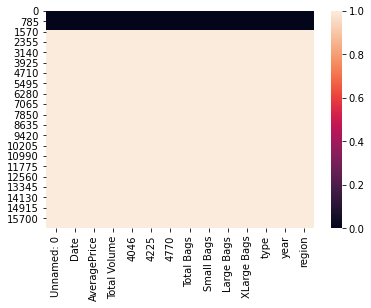

In [8]:
#checking null values using heatmap

sns.heatmap(df.isnull())

true null values are reflecting the plots also. So,better drop all these rows having null values.

In [9]:
df.dropna(axis=0,inplace=True)

In [10]:
df.shape

(1517, 14)

Our new shape is 1517 rows with 14 columns.

In [11]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

Now, no null values are presnt in our datsets.

In [12]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


As, we can see unnamed column & year column are not going to give any releavant information. Dropping these columns also from our datset.

In [13]:
df.drop(['Unnamed: 0','year'],inplace=True,axis=1)

In [14]:
df.shape

(1517, 12)

now we are with 1517 rows and 12 columns.

In [15]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany


In [16]:
#extracting date month and year from date column.

df['date']=pd.to_datetime(df.Date, format='%d-%m-%Y').dt.day
df['month']=pd.to_datetime(df.Date, format='%d-%m-%Y').dt.month
df['year']=pd.to_datetime(df.Date, format='%d-%m-%Y').dt.year

In [17]:
df.drop(['Date'],inplace=True,axis=1)

In [18]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,region,date,month,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,Albany,27,12,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,Albany,20,12,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,Albany,13,12,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,Albany,6,12,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,Albany,29,11,2015


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1517 entries, 0 to 1516
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  1517 non-null   float64
 1   Total Volume  1517 non-null   float64
 2   4046          1517 non-null   float64
 3   4225          1517 non-null   float64
 4   4770          1517 non-null   float64
 5   Total Bags    1517 non-null   float64
 6   Small Bags    1517 non-null   float64
 7   Large Bags    1517 non-null   float64
 8   XLarge Bags   1517 non-null   float64
 9   type          1517 non-null   object 
 10  region        1517 non-null   object 
 11  date          1517 non-null   int64  
 12  month         1517 non-null   int64  
 13  year          1517 non-null   int64  
dtypes: float64(9), int64(3), object(2)
memory usage: 165.9+ KB


#Sp, now we can see from the above, that there are no null values.
Also, type&region are having object data types.
date,month & year are having int datatypes
and rest all are float data types.

In [20]:
df.shape

(1517, 14)

# Data Visualization

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

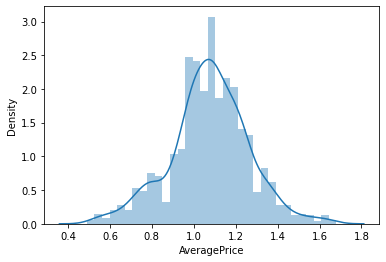

In [21]:
sns.distplot(df['AveragePrice'],kde=True)

Clearly visible this is a normla distribution average price is in between 1.0-1.2

<AxesSubplot:xlabel='type', ylabel='count'>

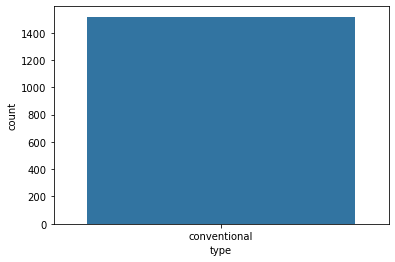

In [22]:
sns.countplot(df['type'])

Only one type is presnt in datasets we can drop that-

In [23]:
df.drop(columns=['type'],axis=1,inplace=True)

Average price with reference to months


Text(0.5, 1.0, 'Average-Price by Month')

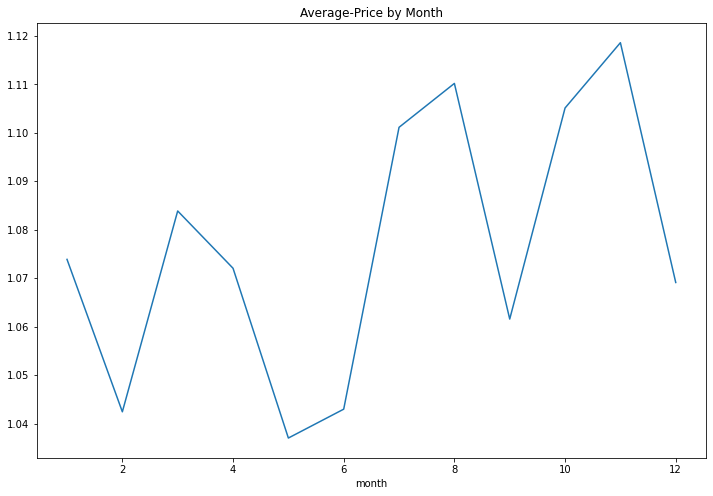

In [24]:
print("Average price with reference to months")
dategroup = df.groupby('month').mean()
plt.figure(figsize=(12,8))
dategroup['AveragePrice'].plot(x=df.month)
plt.title('Average-Price by Month')

Initially price falls down till february, then increasing & decreasing till june. From june onwards it increase steeply till august. Then again from september increase & decrease.

Text(0.5, 1.0, 'Average-Price by year')

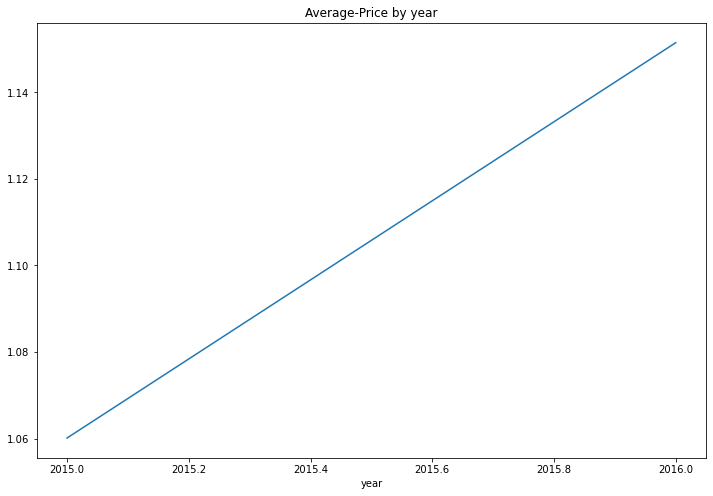

In [25]:
dategroup = df.groupby('year').mean()
plt.figure(figsize=(12,8))
dategroup['AveragePrice'].plot(x=df.year)
plt.title('Average-Price by year')

average price is linearly increasing throughout the year

<AxesSubplot:title={'center':'Average price in year-wise'}, xlabel='year', ylabel='AveragePrice'>

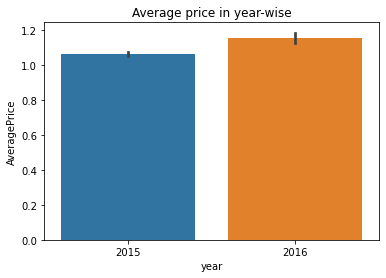

In [26]:
plt.title("Average price in year-wise")
sns.barplot(x = "year" , y = "AveragePrice" ,data=df )

Clearly we can see, 2016  average price is slightly more than 2015.

<AxesSubplot:title={'center':'Selling in year-wise'}, xlabel='year', ylabel='Total Volume'>

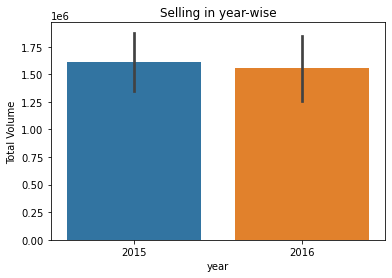

In [27]:
plt.title("Selling in year-wise")
sns.barplot(x = "year" , y = "Total Volume" ,data=df )

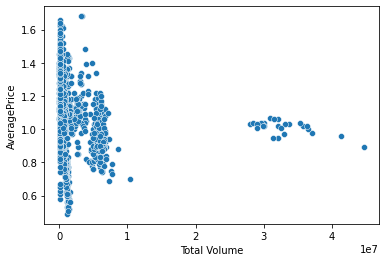

In [28]:
sns.scatterplot(df['Total Volume'],df['AveragePrice']);

we can clearly see increase in total volume leads to decrease in average price

Text(0.5, 1.0, 'Average Price in each region')

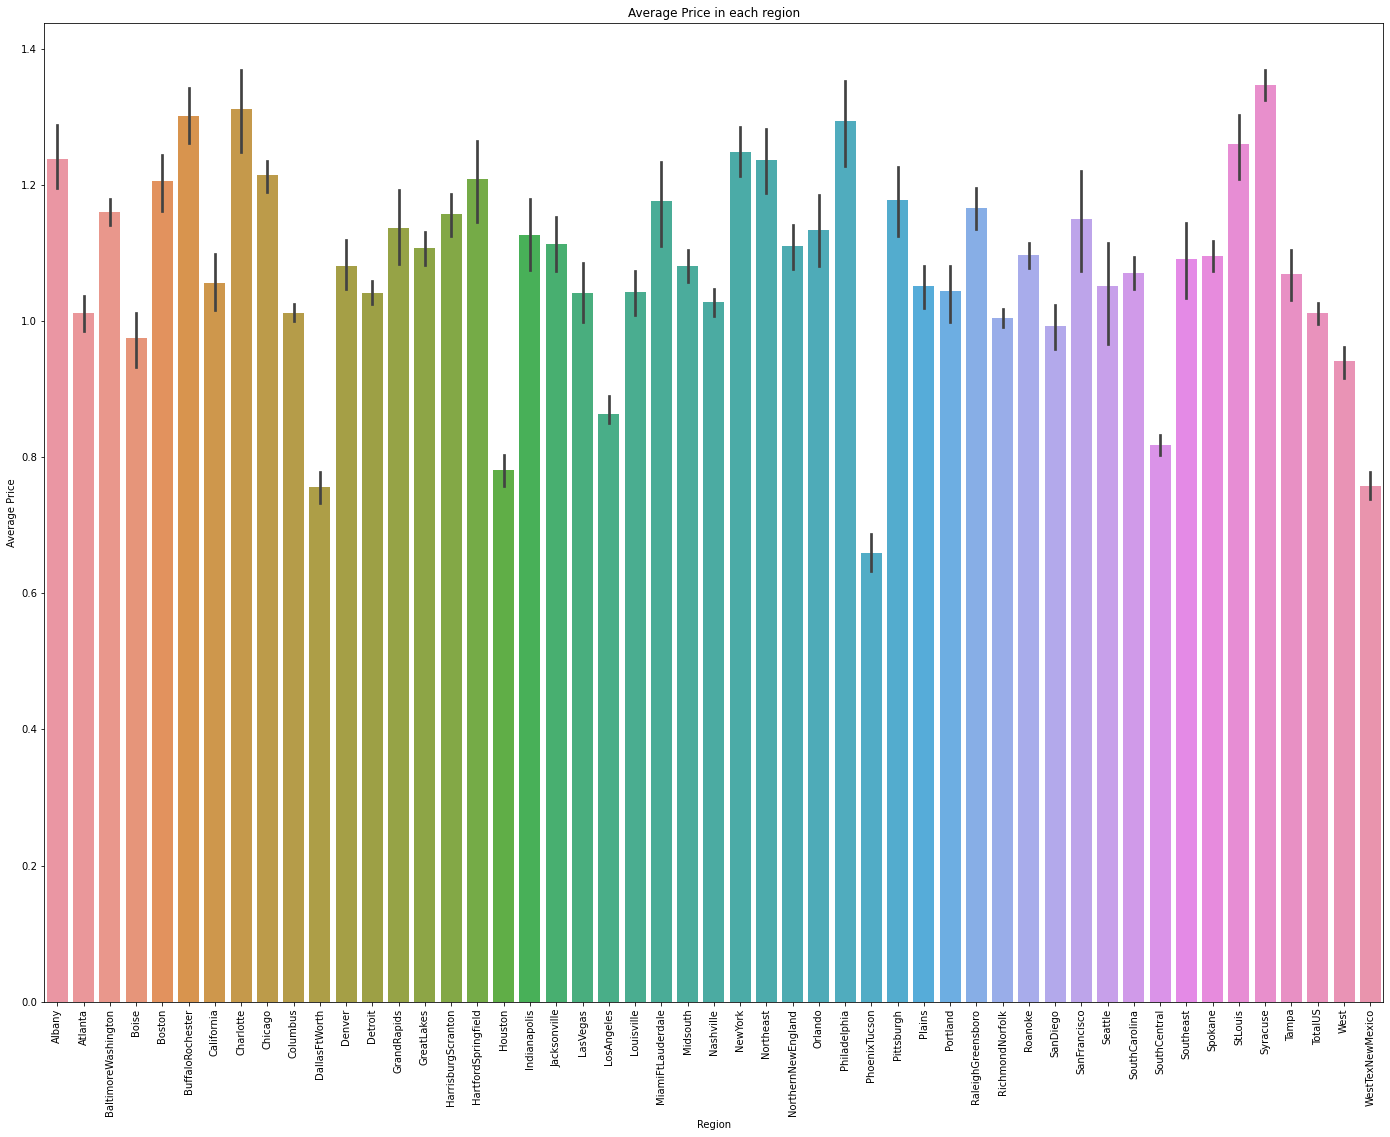

In [29]:
plt.figure(figsize=(24,18))
sns.barplot(x='region',y='AveragePrice',data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average Price in each region')

from the above observations,we can clearly see that syracuse has the highest avg price, followed by Philadephia, St. Louis, New Yok and Norht East

Text(0.5, 1.0, 'selling in each region')

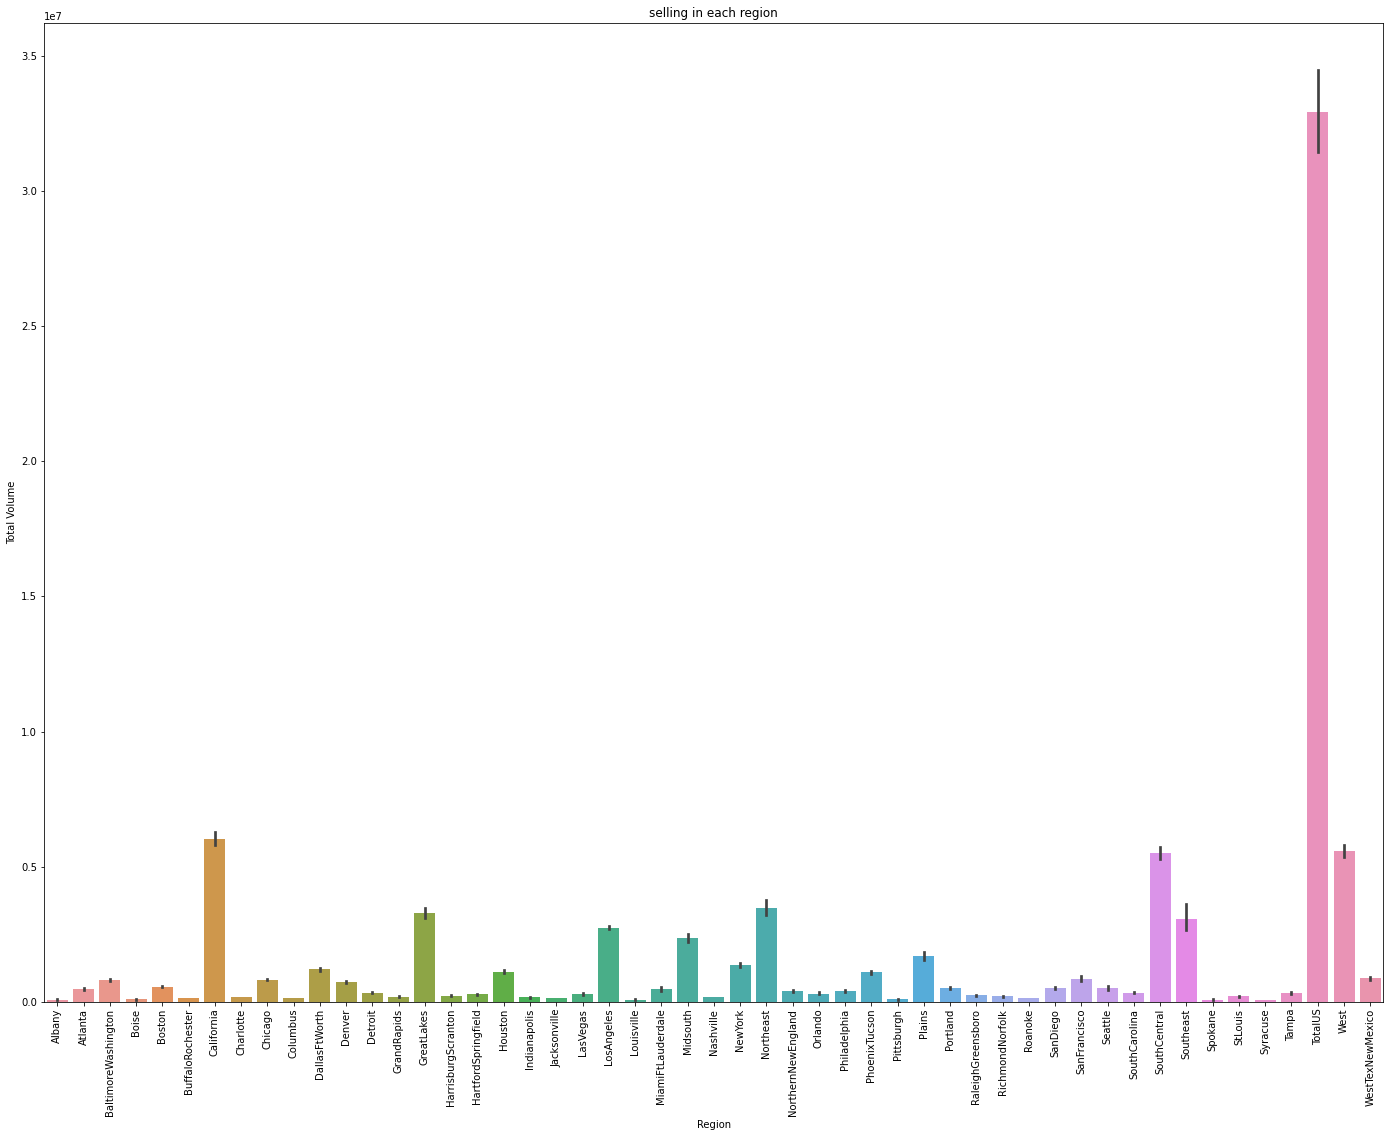

In [30]:
plt.figure(figsize=(24,18))
sns.barplot(x='region',y='Total Volume',data=df)
plt.xticks(rotation=90)
plt.xlabel('Region')
plt.ylabel('Total Volume')
plt.title('selling in each region')

Total US is having the highest sell.
And, inside that part California have the highest sell and Syracuse have the lowest sell.
People in California consumes more avocados than other states.

<AxesSubplot:xlabel='Total Bags', ylabel='Small Bags'>

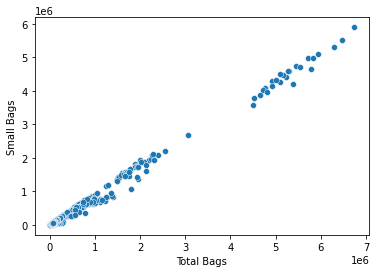

In [31]:
sns.scatterplot(x='Total Bags',y='Small Bags',data=df)

Total bags increases with increase in small bags.

<AxesSubplot:xlabel='Total Bags', ylabel='Large Bags'>

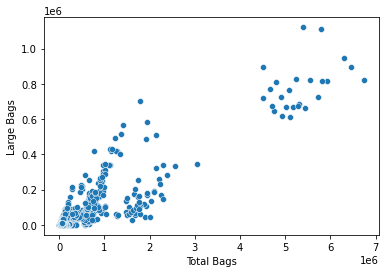

In [32]:
sns.scatterplot(x='Total Bags',y='Large Bags',data=df)

Initially large bags is having high demand, slowly slowly decreases.

<AxesSubplot:xlabel='Total Bags', ylabel='XLarge Bags'>

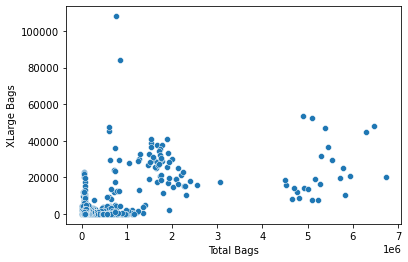

In [33]:
sns.scatterplot(x='Total Bags',y='XLarge Bags',data=df)

XLarge bags are having very high demands initially.

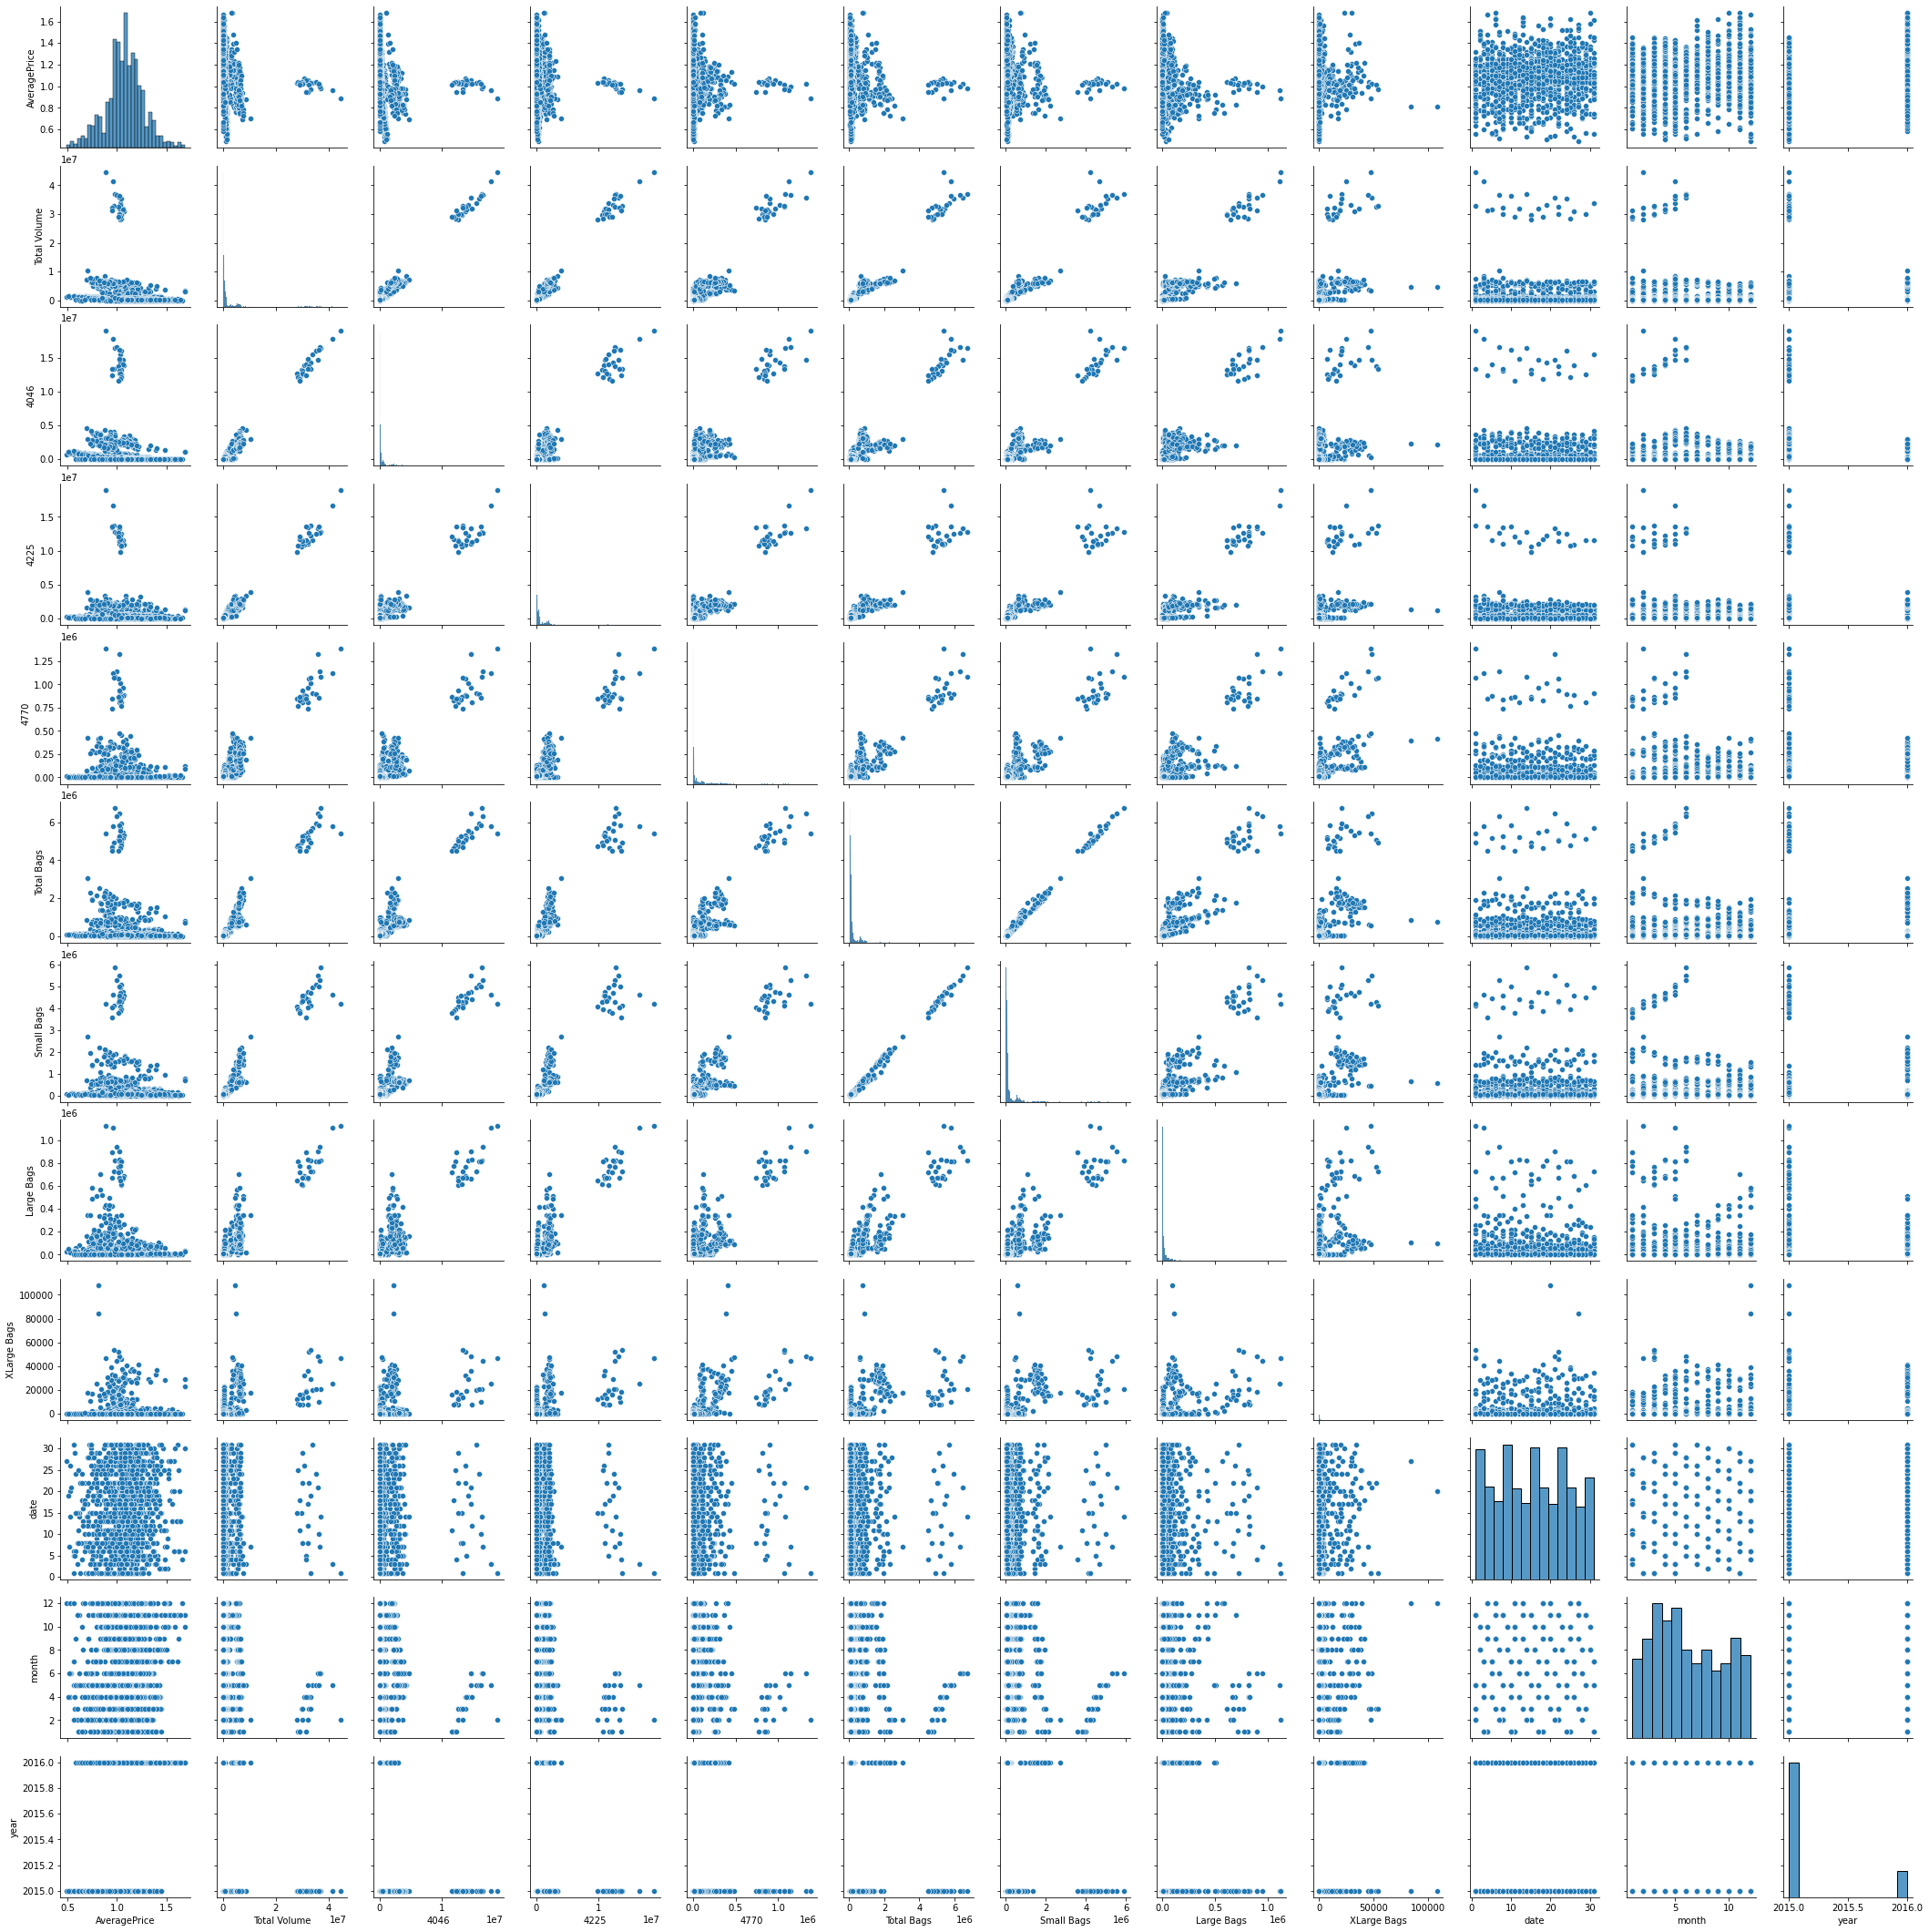

In [34]:
#Plotting pairplot for columns

sns.pairplot(df)
plt.show()


# Correlation

In [35]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,date,month,year
AveragePrice,1.000000,-0.140470,-0.190096,-0.092084,-0.100567,-0.111597,-0.097682,-0.177480,-0.048284,0.092531,0.066859,0.178683
Total Volume,-0.140470,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717,-0.022423,-0.090520,-0.004189
4046,-0.190096,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063,-0.018394,-0.090647,-0.040439
4225,-0.092084,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718,-0.032709,-0.091329,-0.007254
4770,-0.100567,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053,-0.014611,-0.074855,0.029222
Total Bags,-0.111597,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856,-0.009035,-0.081330,0.090108
Small Bags,-0.097682,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300,-0.003583,-0.084376,0.106382
Large Bags,-0.177480,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779,-0.038890,-0.062447,-0.018678
XLarge Bags,-0.048284,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000,0.009174,0.049232,0.218342
date,0.092531,-0.022423,-0.018394,-0.032709,-0.014611,-0.009035,-0.003583,-0.038890,0.009174,1.000000,0.034279,0.023543


From the observations we can see-

average price is having positive best correlation with year.

Total volume is having very good correlation with 4046 & 4225.

Small &Large bags are also having good correlation with Total volume.



<AxesSubplot:>

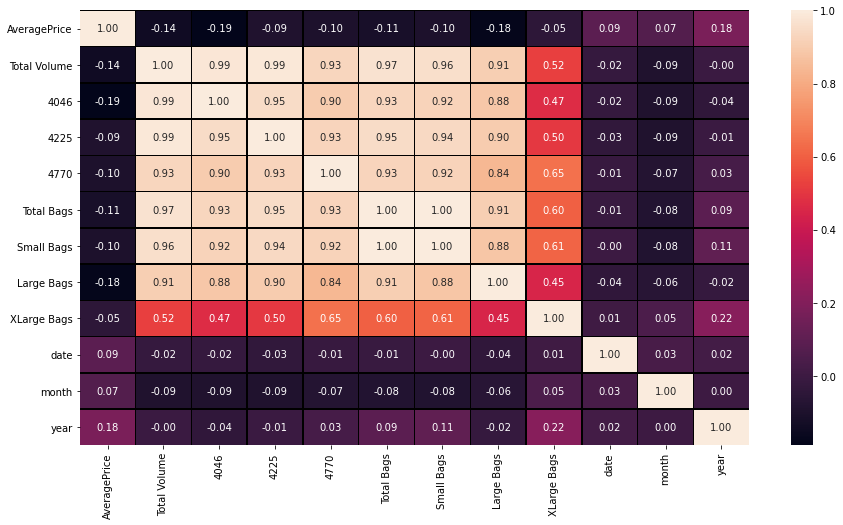

In [36]:
#Correlation with using heatmap

plt.figure(figsize=(15,8))
sns.heatmap(df.corr(),annot=True,linewidth=0.5,linecolor='black',fmt='.2f')

Also, we can observe from the heatmap plotting-

Total volume, Small bags and and total bags are higly correlated.

Average price and Large, Small bags are higly negative correlated.

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
AveragePrice,1517.0,1.074990e+00,1.888912e-01,0.49,0.98,1.08,1.19,1.68
Total Volume,1517.0,1.601879e+06,4.433143e+06,38750.74,147469.99,402791.86,981975.08,44655461.51
4046,1517.0,6.464387e+05,1.947614e+06,467.72,20400.34,81751.17,377578.48,18933038.04
4225,1517.0,6.114375e+05,1.672906e+06,1783.77,41476.06,118664.89,485150.34,18956479.74
4770,1517.0,5.040550e+04,1.377812e+05,0.00,911.25,7688.17,29167.30,1381516.11
Total Bags,1517.0,2.935974e+05,7.579765e+05,3311.77,36206.89,73979.06,157609.68,6736304.04
Small Bags,1517.0,2.487736e+05,6.474765e+05,3311.77,29727.22,62375.69,146199.35,5893641.72
Large Bags,1517.0,4.264205e+04,1.182157e+05,0.00,540.74,5044.35,29267.67,1121076.47
XLarge Bags,1517.0,2.181771e+03,7.455712e+03,0.00,0.00,0.00,401.48,108072.79
date,1517.0,1.544957e+01,8.796714e+00,1.00,8.00,15.00,22.00,31.00


We can observe from the above-

1517 values count in each columns confirm that we do not have any missing values in our data set.

Average maximum price is 1.68 and minimum price is 0.49

Total Volume, Total Bag, 4046, 4770, 1225, Small,Large & XL bags are having highest standard deviation.

Outliers are present in our dataset as in some columns there is huge differnece between 75% and maximum value.

Skewness is present in few columns as there is differnce between mean and 50% value.

# Data Cleaning

# Outlier checking

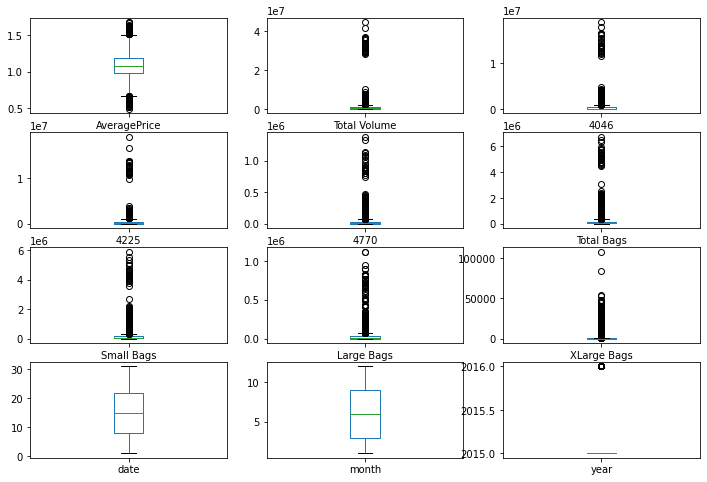

In [38]:
df.plot(kind='box',subplots=True,layout=(12,3),figsize=(12,25))
plt.show()

We cn see there are few outliers are present in our datsets.Lets remove that first.

# Label Encoding

In [39]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
features=list()

for column in range(len(df.columns)):
    df[df.columns[column]]=le.fit_transform(df[df.columns[column]])
    features_dict={index: label for index, label in enumerate(le.classes_)}
    features.append(features_dict)

In [40]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,date,month,year
0,81,71,54,506,68,41,46,78,0,0,26,11,0
1,83,35,11,413,92,58,68,82,0,0,19,11,0
2,41,294,22,742,194,34,39,86,0,0,12,11,0
3,56,152,61,625,112,8,7,107,0,0,5,11,0
4,76,27,41,406,115,12,10,143,0,0,28,10,0


Now we can apply zscore on the datset.

# Applying zscore

In [41]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z.shape

(1517, 13)

In [42]:
threshold=3
print(np.where(z>3))

(array([1457, 1458], dtype=int32), array([0, 0], dtype=int32))


In [43]:
df_new=df[(z<3).all(axis=1)]
print(df.shape)
print(df_new.shape)

(1517, 13)
(1515, 13)


In [44]:
df=df_new
print(df.shape)

(1515, 13)


In [45]:
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
region          0
date            0
month           0
year            0
dtype: int64

no null values are presnt in the datasets

Now we are going to divide the target and feature columns

In [46]:
x = df.drop(['AveragePrice'],axis=1)
y = df['AveragePrice']

# Checking Skewness

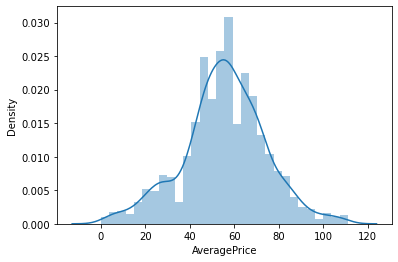

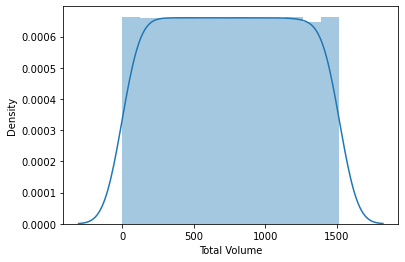

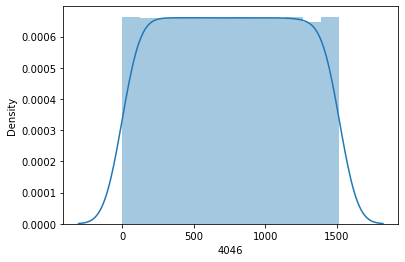

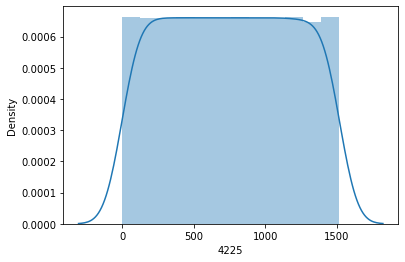

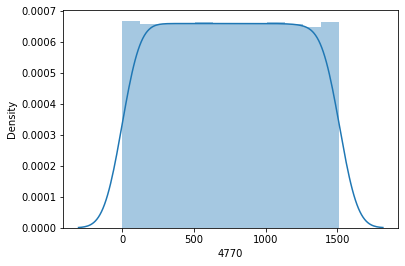

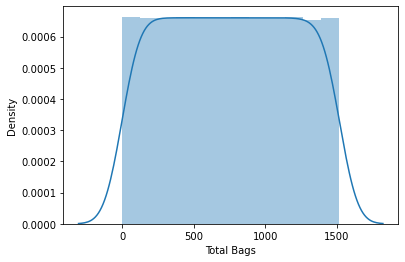

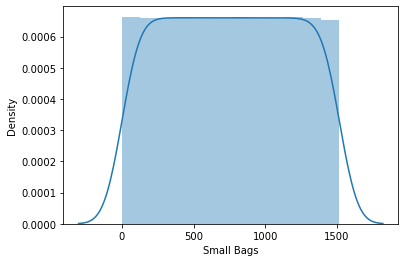

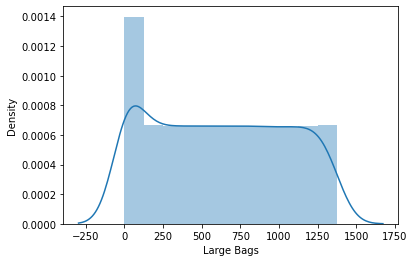

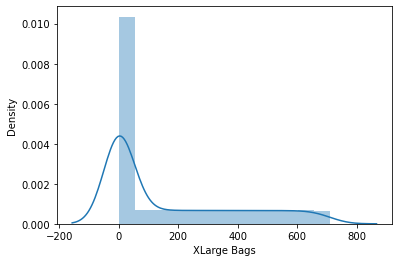

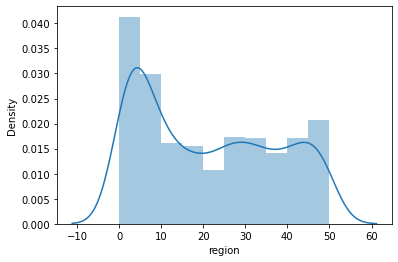

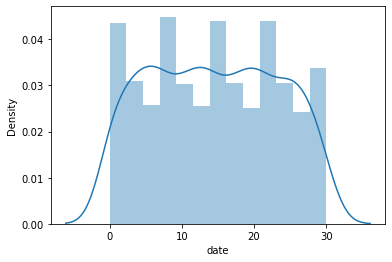

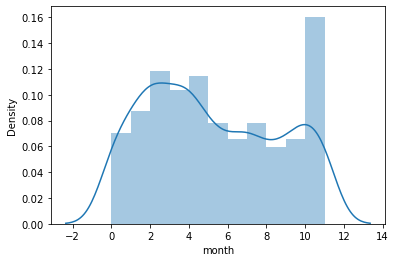

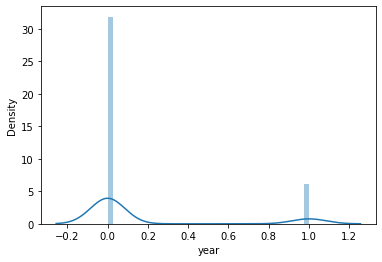

In [47]:
for i in df.columns:
    if df[i].dtypes==float or df[i].dtypes==int:
        plt.figure()
        sns.distplot(df[i],kde=True)
        plt.show()

Only average price is normal distributed

In [48]:
x.skew()

Total Volume    0.002269
4046            0.002254
4225            0.002367
4770            0.002863
Total Bags      0.001805
Small Bags      0.001528
Large Bags      0.069310
XLarge Bags     1.028178
region          0.285834
date            0.026802
month           0.236227
year            1.839371
dtype: float64

# Handling skewness

In [49]:
for i in x:
    if x[i].skew()>0.55:
        x[i]=np.log1p(x[i])

In [50]:
x.skew()

Total Volume    0.002269
4046            0.002254
4225            0.002367
4770            0.002863
Total Bags      0.001805
Small Bags      0.001528
Large Bags      0.069310
XLarge Bags     0.236765
region          0.285834
date            0.026802
month           0.236227
year            1.839371
dtype: float64

# Standard Scaling

In [51]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
k=sc.fit_transform(x)
x=pd.DataFrame(k,columns = x.columns)

In [52]:
x.head()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,region,date,month,year
0,-1.567769,-1.606615,-0.574011,-1.572855,-1.636527,-1.625213,-1.277648,-0.921302,-1.315486,1.314676,1.723087,-0.439219
1,-1.650013,-1.704851,-0.786458,-1.518012,-1.597680,-1.574935,-1.268292,-0.921302,-1.315486,0.518165,1.723087,-0.439219
2,-1.058318,-1.679721,-0.034897,-1.284929,-1.652523,-1.641211,-1.258937,-0.921302,-1.315486,-0.278347,1.723087,-0.439219
3,-1.382722,-1.590623,-0.302170,-1.472309,-1.711935,-1.714343,-1.209821,-0.921302,-1.315486,-1.074859,1.723087,-0.439219
4,-1.668289,-1.636314,-0.802449,-1.465454,-1.702795,-1.707487,-1.125622,-0.921302,-1.315486,1.542251,1.427984,-0.439219


In [53]:
x.shape,y.shape

((1515, 12), (1515,))

# Modeling

In [54]:
#models froms sickit learn
from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

#ensemble technique
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Importing some metrics we can use to evaluate our model performance.... 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [55]:
#models used for modelling

LR = LinearRegression()
RR = Ridge()
LSR = Lasso()
KNR = KNeighborsRegressor()
DTR = DecisionTreeRegressor()
RFR = RandomForestRegressor()
GBR = GradientBoostingRegressor()

In [57]:
models = []
models.append(("LinearRegression", LR))
models.append(("Ridge", RR))
models.append(("Lasso", LSR))
models.append(("KNeighborsRegressor", KNR))
models.append(("DecisionTreeRegressor", DTR))
models.append(("RandomForestRegressor", RFR))
models.append(("GradientBoostingRegressor", GBR))

In [58]:
model = [DecisionTreeRegressor(),RandomForestRegressor(),KNeighborsRegressor(),LinearRegression(),GradientBoostingRegressor()]
max_r2_score = 0

for r in range(40,85):
    x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = r,test_size = 0.20)
    for i in model:
        i.fit(x_train,y_train)
        pre = i.predict(x_test)
        r2_scr = r2_score(y_test,pre)
        print("R2 score correspond to random state" ,r,"is", r2_scr)
        
        if r2_scr> max_r2_score:
            max_r2_score=r2_scr
            final_state = r
            final_model = i
            
print()
print("max R2 score correspond to random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score correspond to random state 40 is 0.676398418703801
R2 score correspond to random state 40 is 0.8629478990511251
R2 score correspond to random state 40 is 0.7552130067854269
R2 score correspond to random state 40 is 0.40271940944928386
R2 score correspond to random state 40 is 0.8156186074686819
R2 score correspond to random state 41 is 0.5564132111872284
R2 score correspond to random state 41 is 0.7979612637854558
R2 score correspond to random state 41 is 0.6642375323561417
R2 score correspond to random state 41 is 0.3059959070030416
R2 score correspond to random state 41 is 0.7448242429395369
R2 score correspond to random state 42 is 0.6526661231871185
R2 score correspond to random state 42 is 0.8350713097782065
R2 score correspond to random state 42 is 0.7603266210302383
R2 score correspond to random state 42 is 0.382904948995889
R2 score correspond to random state 42 is 0.7747675758503461
R2 score correspond to random state 43 is 0.6947738307145732
R2 score correspond to ra

so we can clearly see that best random state is 47 of random regressor with maximum r2_score of 0.88

In [59]:
kf = KFold(n_splits=5, random_state=47,shuffle=True)
Model = []
score = []
cvs = []
MSE = []
MAE = []
RMAE = []

In [60]:
for name,model in models:
    
    Model.append(name)
    print('******************',name,'*******************')
    model.fit(x_train,y_train)
    print(model)
    pre = model.predict(x_test)
    
    r2 = r2_score(y_test,pre)
    print("R2 Score = ",r2)
    score.append(r2)
    
    sc = cross_val_score(model,x,y,cv=kf,scoring="r2").mean()
    print("Cross val score = ",sc)
    cvs.append(sc)
    
    mse = mean_squared_error(y_test,pre)
    print("Mean Squared error: ",mse)
    MSE.append(mse)
    
    mae = mean_absolute_error(y_test,pre)
    print("Mean absolute error: ",mae)
    MAE.append(mae)
    
    rmae = np.sqrt(mean_absolute_error(y_test,pre))
    print("Root Mean absolute error: ",rmae)
    RMAE.append(rmae)

****************** LinearRegression *******************
LinearRegression()
R2 Score =  0.39720655349019607
Cross val score =  0.3610669601116186
Mean Squared error:  205.43008149741635
Mean absolute error:  11.16119681020038
Root Mean absolute error:  3.3408377407770615
****************** Ridge *******************
Ridge()
R2 Score =  0.3972794323082689
Cross val score =  0.3610876608160625
Mean Squared error:  205.40524462896198
Mean absolute error:  11.156860046538494
Root Mean absolute error:  3.3401886243951093
****************** Lasso *******************
Lasso()
R2 Score =  0.3493641820839877
Cross val score =  0.3171728964154877
Mean Squared error:  221.73460888389187
Mean absolute error:  11.519440406934006
Root Mean absolute error:  3.3940301128502095
****************** KNeighborsRegressor *******************
KNeighborsRegressor()
R2 Score =  0.7413996746506528
Cross val score =  0.7345245915526141
Mean Squared error:  88.13016501650166
Mean absolute error:  6.933333333333334
Ro

In [61]:
result = pd.DataFrame({"Model": Model, "R2 Socre": score, "Cross val score": cvs,"Root Mean Absolute Error": RMAE})
result

,Model,R2 Socre,Cross val score,Root Mean Absolute Error
0,LinearRegression,0.397207,0.361067,3.340838
1,Ridge,0.397279,0.361088,3.340189
2,Lasso,0.349364,0.317173,3.394030
3,KNeighborsRegressor,0.741400,0.734525,2.633122
4,DecisionTreeRegressor,0.616730,0.641562,2.715923
5,RandomForestRegressor,0.812332,0.835225,2.368690
6,GradientBoostingRegressor,0.760794,0.775171,2.613345


So from the above table we can choose, Random forest regressor is having best r2_score with 82%, cross val score 
with 83% and rmae with 2. 
SO now we are going for hyper tuning this model.

# Hyper Parameter tuning

In [62]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt']}
clf=GridSearchCV(RFR,parameters)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'mse', 'max_features': 'sqrt'}


In [63]:
RFR=RandomForestRegressor(criterion='mse',max_features='sqrt')
RFR.fit(x_train,y_train)
pred_rfr=RFR.predict(x_test)
print("Score=",RFR.score(x_train,y_train))
print('mean absolute error:',mean_absolute_error(y_test,pred_rfr))
print('Root mean squared error:', np.sqrt(mean_squared_error(y_test,pred_rfr)))
print('R2 score is:',r2_score(y_test,pred_rfr))

Score= 0.9788638851687292
mean absolute error: 5.474290429042903
Root mean squared error: 7.5584678760753725
R2 score is: 0.8323621713626735


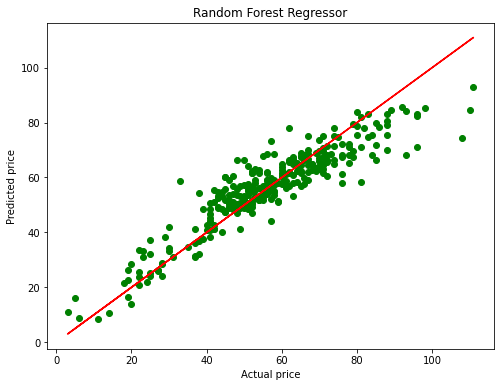

In [65]:
plt.figure(figsize=(8,6))
plt.scatter(x=y_test, y=pred_rfr, color='g')
plt.plot(y_test,y_test,color='r')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Random Forest Regressor')
plt.show()

# Our final model, Random regressor has an r2 score of 83% 